# Exercise 07 : Heatmap

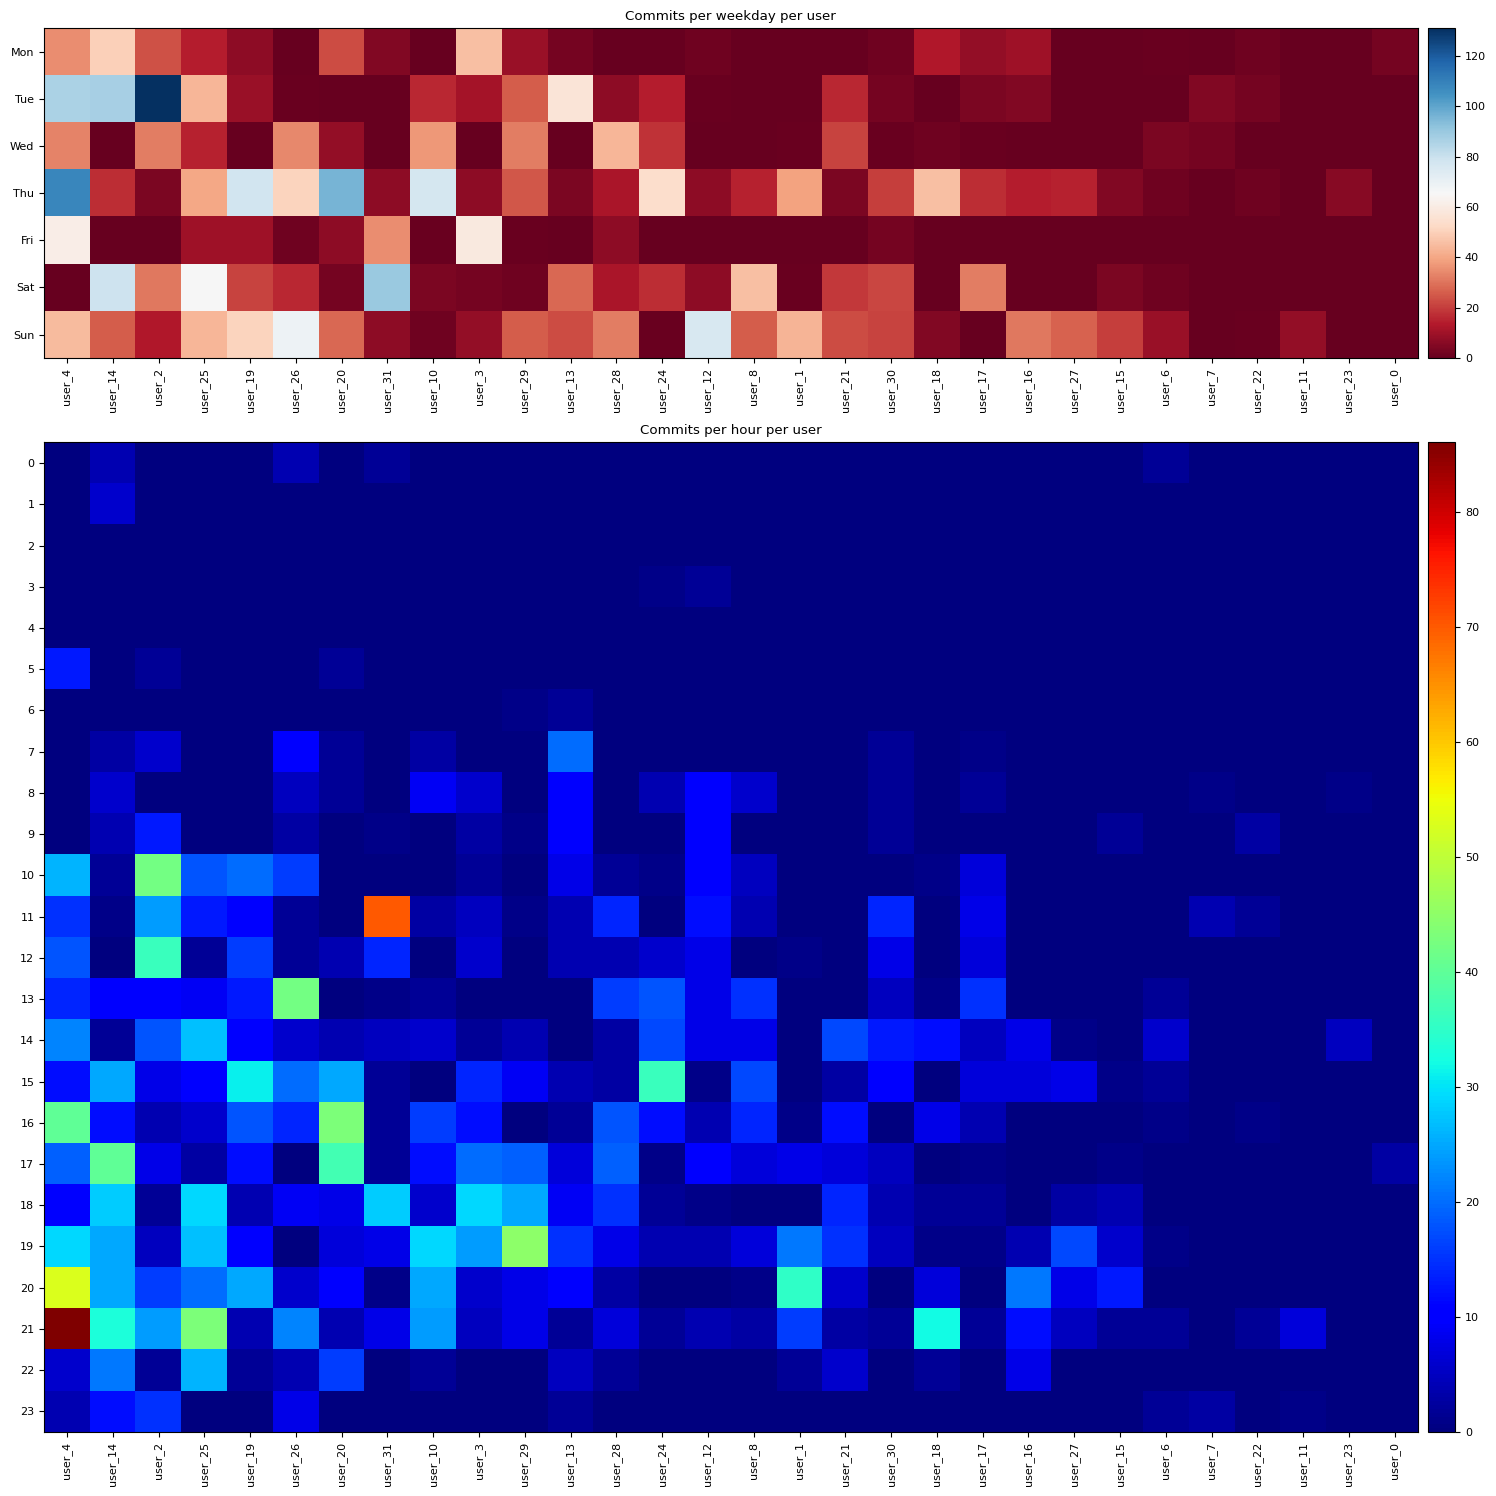

ANSWERS:
1. Which user has the most commits on Tue? user_2
2. Which user has the most commits on Thu? user_4
3. On which weekday do the users not like making a lot of commits? Fri
4. Which user at which hour made the largest number of commits? user_4, 21

TESTS:
Dataframe for first graph: 7 rows? PASSED
Dataframe for first graph: 30 columns? PASSED
First three columns: user_4, user_14, user_2? PASSED
Dataframe for second graph: 24 rows? PASSED
Dataframe for second graph: 30 columns? PASSED
First three columns: user_4, user_14, user_2? PASSED


In [ ]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable

plt.rcParams.update({"font.size": 8})

con = sqlite3.connect(r"../data/checking-logs.sqlite")

chk = pd.read_sql("SELECT uid, timestamp FROM checker WHERE uid LIKE 'user_%'", 
                  con, parse_dates=['timestamp'])

chk['weekday'] = chk['timestamp'].dt.day_name().str[:3]
chk['hour'] = chk['timestamp'].dt.hour

# create weekday and hour dataframes using COUNT of rows (not sum of numTrials)
by_user_weekday = chk.groupby(['weekday', 'uid']).size().unstack(fill_value=0)
by_user_hour = chk.groupby(['hour', 'uid']).size().unstack(fill_value=0)

full_hours = pd.Index(range(24), name='hour')
by_user_hour = by_user_hour.reindex(full_hours, fill_value=0)


# sort users 
total_commits = by_user_weekday.sum().sort_values(ascending=False)
by_user_weekday = by_user_weekday[total_commits.index]
by_user_hour = by_user_hour[total_commits.index]

# weekdays in correct order
weekday_order = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
by_user_weekday = by_user_weekday.reindex(weekday_order)

# plots
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(15, 15), gridspec_kw={'height_ratios': [1, 3]})

# weekday heatmap
im1 = ax1.imshow(by_user_weekday.values, aspect='auto', cmap='RdBu')
ax1.set_yticks(range(len(by_user_weekday.index)))
ax1.set_yticklabels(by_user_weekday.index)
ax1.set_xticks(range(len(total_commits.index)))
ax1.set_xticklabels(total_commits.index, rotation=90)
ax1.set_title('Commits per weekday per user')

divider = make_axes_locatable(ax1)
cax = divider.append_axes("right", size="2%", pad=0.1)
fig.colorbar(im1, cax=cax)

# hour heatmap
im2 = ax2.imshow(by_user_hour.values, aspect='auto', cmap='jet')
ax2.set_yticks(range(len(by_user_hour.index)))
ax2.set_yticklabels(by_user_hour.index)
ax2.set_xticks(range(len(total_commits.index)))
ax2.set_xticklabels(total_commits.index, rotation=90)
ax2.set_title('Commits per hour per user')

divider2 = make_axes_locatable(ax2)
cax2 = divider2.append_axes("right", size="2%", pad=0.1)
fig.colorbar(im2, cax=cax2)

plt.tight_layout()
plt.show()

# answers
tue_user = by_user_weekday.loc['Tue'].idxmax()
thu_user = by_user_weekday.loc['Thu'].idxmax()
least_weekday = by_user_weekday.sum(axis=1).idxmin()
max_cell = by_user_hour.stack().idxmax()

con.close()

# answers
print("ANSWERS:")
print(f"1. Which user has the most commits on Tue? {tue_user}")
print(f"2. Which user has the most commits on Thu? {thu_user}")
print(f"3. On which weekday do the users not like making a lot of commits? {least_weekday}")
print(f"4. Which user at which hour made the largest number of commits? {max_cell[1]}, {max_cell[0]}")

# Tests
print("\nTESTS:")
print("Dataframe for first graph: 7 rows?", 'PASSED' if by_user_weekday.shape[0] == 7 else 'FAILED')
print("Dataframe for first graph: 30 columns?", 'PASSED' if by_user_weekday.shape[1] == 30 else 'FAILED')
print("First three columns: user_4, user_14, user_2?", 
      'PASSED' if list(by_user_weekday.columns[:3]) == ['user_4', 'user_14', 'user_2'] else 'FAILED')
print("Dataframe for second graph: 24 rows?", 'PASSED' if by_user_hour.shape[0] == 24 else 'FAILED')
print("Dataframe for second graph: 30 columns?", 'PASSED' if by_user_hour.shape[1] == 30 else 'FAILED')
print("First three columns: user_4, user_14, user_2?", 
      'PASSED' if list(by_user_hour.columns[:3]) == ['user_4', 'user_14', 'user_2'] else 'FAILED')